우선 NumPy를 사용하기 위해 `ndarray` 객체를 만들어야 합니다. `ndarray` 객체를 이용하면 파이썬에서 사용하는 대규모 데이터 집합을 n차원 배열로 담을 수 있습니다. `ndarray`를 그냥 array라고 부르기도 합니다.

# 1) `ndarray` 만들기
***

`ndarray` 객체는 `arange()`와 `array([])`로 만들 수 있습니다.

In [2]:
import numpy as np

# 아래 A와 B는 결과적으로 같은 ndarray 객체를 생성함.
A = np.arange(5)
B = np.array([0,1,2,3,4])   # 파이썬 리스트를 numpy ndarray로 변환

# 하지만 C는 좀 다를 것임.
C = np.array([0,1,2,3,'4'])

# D도 A, B와 같은 결과를 내겠지만, B의 방법을 권합니다. 
D = np.ndarray((5,), np.int64, np.array([0,1,2,3,4]))

print(A)
print(type(A))
print("--------------------------")
print(B)
print(type(B))
print("--------------------------")
print(C)
print(type(C))
print("--------------------------")
print(D)
print(type(D))

[0 1 2 3 4]
<class 'numpy.ndarray'>
--------------------------
[0 1 2 3 4]
<class 'numpy.ndarray'>
--------------------------
['0' '1' '2' '3' '4']
<class 'numpy.ndarray'>
--------------------------
[0 1 2 3 4]
<class 'numpy.ndarray'>


C의 경우 놀랍게도 '4'가 하나 들어갔을 뿐인데 0, 1, 2, 3이 모두 문자열로 바뀌었습니다. 왜일까요?

`numpy.ndarray`도 array이므로 모든 element의 type이 동일해야 합니다. 여기서 파이썬의 유연함이 드러납니다. 문자열을 모두 숫자로 바꿀 수는 없지만 숫자는 모두 문자열로 바꿔 줄 수 있습니다. 그래서 숫자만 있던 `ndarray`에 문자열이 들어가면 모든 숫자를 문자열로 해석해서 array의 요건을 맞춰줍니다. 만약 우리의 의도가 이런 게 아니었다면 오히려 예상치 못할 부작용이 생길 수 있으니 유의해야겠지요?

# 2) 크기 (size, shape, ndim)
***
* ndarray.size
* ndarray.shape
* ndarray.ndim
* reshape()  

`size, shape, ndim` 는 각각 행렬 내 원소의 개수, 행렬의 모양, 행렬의 축(axis)의 개수를 의미합니다. `reshape()` 메서드는 행렬의 모양을 바꿔줍니다. 주의할 점은 모양을 바꾸기 전후 행렬의 총 원소 개수(size)가 맞아야 한다는 거에요.

In [38]:

A = np.arange(10).reshape(5,2,1)     # 길이 10의 1차원 행렬을 2X5 2차원 행렬로 바꿔봅니다.

print("행렬의 모양: ",A.shape)
print("행렬의 축 개수: ",A.ndim)
print("행렬 내 원소의 개수: ",A.size)
print(A)


행렬의 모양:  (5, 2, 1)
행렬의 축 개수:  3
행렬 내 원소의 개수:  10
[[[0]
  [1]]

 [[2]
  [3]]

 [[4]
  [5]]

 [[6]
  [7]]

 [[8]
  [9]]]


원소 10개의 ndarray를 2 X 5행렬로 reshape 해주었습니다.

2X5 행렬은 원소 10개와 행렬의 모양이 맞지만, 3 X 3으로 reshape하면 모양과 원소의 개수가 맞지 않죠? 그래서 아래 코드는 에러가 납니다.

In [5]:
A = np.arange(10)
print('A: ', A)
B = np.arange(10).reshape(2,5)
print('B:', B)
C = np.arange(10).reshape(3,3)       # 이 줄에서 에러가 날 것입니다.
print('C:', C)

A:  [0 1 2 3 4 5 6 7 8 9]
B: [[0 1 2 3 4]
 [5 6 7 8 9]]


ValueError: cannot reshape array of size 10 into shape (3,3)

# 3) type
***
NumPy 라이브러리 내부의 자료형들은 파이썬 내장함수와 동일합니다. 그러나 살짝 헷갈리는 기능이 있을 수 있어요. 바로 내장함수 type()과 dtype()메서드입니다.  

* NumPy: `numpy.array.dtype`
* 파이썬: `type()`

In [16]:
A = np.arange(6).reshape(2,3)
print(A)
print(A.dtype)
print(type(A))
print("-----------------------------")

B = np.array([0,1,2,3,4,5])
print(B)
print(B.dtype)
print(type(B))
print("-----------------------------")

C = np.array([0,1,2,3,'4',5])
print(C)
print(C.dtype)
print(type(C))
print("-------------------------------------")

D = np.array([0,1,2,3,[4,5],6])     # 이런 ndarray도 만들어 질까요?
print(D)
print(D.dtype)
print(type(D))
print("----------------------------------------")

[[0 1 2]
 [3 4 5]]
int64
<class 'numpy.ndarray'>
-----------------------------
[0 1 2 3 4 5]
int64
<class 'numpy.ndarray'>
-----------------------------
['0' '1' '2' '3' '4' '5']
<U21
<class 'numpy.ndarray'>
-------------------------------------
[0 1 2 3 list([4, 5]) 6]
object
<class 'numpy.ndarray'>
----------------------------------------


/tmp/ipykernel_48/4021498952.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  D = np.array([0,1,2,3,[4,5],6])     # 이런 ndarray도 만들어 질까요?


차이가 느껴지시나요? NumPy의 원소는 꼭 동일한 데이터 type이어야 합니다. NumPy의 메서드인 `dtype`은 NumPy ndarray의 "원소"의 데이터 타입을 반환해요.

반면에 파이썬 내장함수인 `type(A)`을 이용하면 행렬 A의 자료형이 반환됩니다.

여기서 재미있는 것은 D의 경우입니다. 이번에는 원소 하나를 `list` 객체로 바꿔 보았습니다. 위의 설명대로라면 NumPy의 원소는 꼭 동일한 데이터 type이어야 하므로 이번만큼은 에러가 날줄 알았는데, 떡하니 정상적으로 ndarray가 만들어집니다. 대신 `D.dtype`은 `object`를 리턴했습니다. 파이썬의 최상위 클래스는 바로 `object`입니다. 그러므로 Numpy는 `dtype`을 `object`로 지정해서라도 행렬 내 `dtype`을 일치시킬 수 있게 됩니다. 다행인 점은 이제 이런 상황을 방지하기 위해서 이런 기능을 deprecate 시켰다는 점이에요.

deprecate 라는 것은 이제 더 이상 관리하지 않는 기능을 뜻합니다. 메서드를 deprecate 할 예정일 때는 기능은 성공적으로 실행시키고 error가 아닌 warning 문구로 경고만 해주는데요. 그 기능을 더 이상 못쓰는 것은 아니지만 이제부터 관리를 하지 않을 테니 오류가 날 확률이 높다는 뜻입니다. 일반적으로 어떻게 코드를 수정해야 하는지 알려주니 메시지를 잘 읽어보는 것이 좋습니다. 여기서는 '... you must specify 'dtype=object' when creating the ndarray.' 라고 말해 주었네요. 코드를 작성하는 사람이 `dtype`을 직접 입력하여 오류를 방지하려는 의도이겠죠? 그럼 다시 작성해 볼게요.

In [17]:
D = np.array([0,1,2,3,[4,5],6], dtype=object) # warning 메시지를 보고 이렇게 바꿔봅니다.
print(D)
print(D.dtype)
print(type(D))

[0 1 2 3 list([4, 5]) 6]
object
<class 'numpy.ndarray'>


In [8]:
C = np.array([0,1,2,3,'4',5])
print(C[0])
print(type(C[0]))
print(C[4])
print(type(C[4]))
print("-----------------------------------------")

D = np.array([0,1,2,3,[4,5],6],dtype= object)
print(D[0])
print(type(D[0]))
print(D[4])
print(type(D[4]))

0
<class 'numpy.str_'>
4
<class 'numpy.str_'>
-----------------------------------------
0
<class 'int'>
[4, 5]
<class 'list'>


# 4) 특수 행렬
***
**NumPy는 수학적으로 의미가 있는 행렬들을 함수로 제공하고 있습니다. 다음은 그 예시입니다.**

* 단위행렬
* 0 행렬
* 1 행렬

In [9]:
# 단위행렬
np.eye(3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
# 0행렬
np.zeros([2,3])


array([[0., 0., 0.],
       [0., 0., 0.]])

In [11]:
# 1행렬
np.ones([3,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

# 5)브로드캐스트
***
NumPy의 강력한 연산 기능 중 하나인 브로드캐스트(broadcast) 연산이에요. ndarray 객체에 상수 연산을 하면 각각의 원소에 어떻게 연산이 적용되는지 확인해 보세요.

In [12]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
# ndarray A에 2를 상수배 했을 때,
A*2

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [14]:
# ndarray A에 2를 더했을 때,
A + 2

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [15]:
# 3 X 3 행렬에 1 X 3 행렬을 더했을 때
A = np.arange(9).reshape(3,3)
B = np.array([1,2,3])
print("A:",A)
print("B:",B)
print("\nA+B:", A+B)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
B: [1 2 3]

A+B: [[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]]


In [16]:
# 3 X 3 행렬에 3 X 1 행렬을 더했을 떄
A = np.arange(9).reshape(3,3)
C = np.array([[1],[2],[3]])
print("A:",A)
print("C:",C)
print("\nA+C:",A+C)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
C: [[1]
 [2]
 [3]]

A+C: [[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In [17]:
# 3 X 3 행렬에 1 X 2 행렬을 더하는 것은 허용되지 않습니다.
A = np.arange(9).reshape(3,3)
D = np.array([1,2])

print("A:",A)
print("D:",D)
print("\nA+D",A+D)

A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
D: [1 2]


ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

이렇게 ndarray와 상수, 또는 서로 크기가 다른 ndarray끼리 산술연산이 가능한 기능을 브로드캐스팅이라고 합니다. Numpy가 파이썬 내장 리스트와 구별되는 큰 특징 중의 하나입니다. 둘 사이에 어떤 차이가 나는지 다음 코드를 통해 비교해 보시기 바랍니다.

In [18]:
print([1,2]+[3,4])
print([1,2]+3)


[1, 2, 3, 4]


TypeError: can only concatenate list (not "int") to list

In [19]:
print(np.array([1,2])+np.array([3,4]))
print(np.array([1,2])+3)

[4 6]
[4 5]


# 6)슬라이스와 인덱싱
***
NumPy도 파이썬 내장 리스트와 비슷한 슬라이스와 인덱싱 연산을 제공합니다. 몇 가지 예제를 통해 연습해 볼게요.

In [39]:
# 3 X 3 행렬의 첫번째 행을 구해 봅시다.
A = np.arange(9).reshape(3,3)
print("A:", A)
B = A[0]
print("B:", B)


A: [[0 1 2]
 [3 4 5]
 [6 7 8]]
B: [0 1 2]


In [21]:
# 0, 1을 인덱싱 하면 A의 첫번쨰 행에서 두번째 값을 참조합니다.
# 아래 두 결과는 정확히 같습니다.
print(A[0,1])
print(B[1])

1
1


In [40]:
# 슬라이싱도 비슷합니다.
A[:-1]
#A[0:3]



array([[0, 1, 2],
       [3, 4, 5]])

아래 그림은 NumPy 기본 인덱싱 배열입니다. 배열은 리스트와 기본적으로 비슷합니다.

그러면 이 배열에서 맨 오른쪽 열을 슬라이싱 하고 싶을 땐 어떻게 해야 할까요?

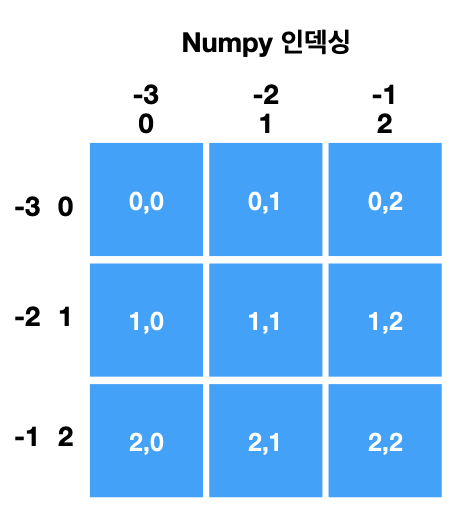

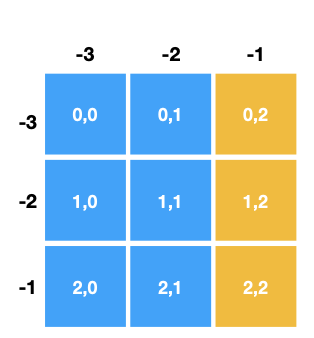

In [23]:
# 이 슬라이싱의 결과는
print(A[:,2:])
print("--------------------------")
print(A[:,1:])
print("--------------------------")
print(A[:,:])
print("--------------------------")
# 이 슬라이싱의 결과와 동일합니다.

print(A[:, -1:])
print("--------------------------")
print(A[:,-2:])
print("--------------------------")
print(A[:,-3:])

[[2]
 [5]
 [8]]
--------------------------
[[1 2]
 [4 5]
 [7 8]]
--------------------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]
--------------------------
[[2]
 [5]
 [8]]
--------------------------
[[1 2]
 [4 5]
 [7 8]]
--------------------------
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [24]:
A[1,:2]

array([3, 4])

In [25]:
A[:2, 1:]

array([[1, 2],
       [4, 5]])

In [26]:
A[:,-1]

array([2, 5, 8])

In [42]:
A[:,-1:]

array([[2],
       [5],
       [8]])

# 7) random
***
NumPy에서도 다양한 의사 난수를 지원합니다. 앞으로 많이 쓰일 기능이니 익혀두세요. 아래는 주로 많이 쓰이는 것들이지만, `np.random` 패키지 안에는 이보다 훨씬 많은 기능이 내장되어 있습니다.  
* np.random.randint()
* np.random.choice()
* np.random.permutation()
* np.random.normal()
* np.random.uniform()


In [36]:
# 의사 난수를 생성하는 예제입니다. 여러번 실행해 보세요.

print(np.random.random())  # 0에서 1사이의 실수형 난수 하나를 생성

print(np.random.randint(0,10))  # 0~9 사이 1개 정수형 난수 하나를 생성

print(np.random.choice([0,1,2,3,4,5,6,7,8,9])) # 리스트에 주어진 값 중 하나를 랜덤하게 골라줌

0.24737548388965724
8
7


In [39]:
# 아래 기능들은 어떤 분포를 따르는 변수를 임의로 표본추출해 줍니다. 

# 이것은 정규분포를 따릅니다.
print(np.random.normal(loc=0, scale=1, size=5))    # 평균(loc), 표준편차(scale), 추출개수(size)를 조절해 보세요.

# 이것은 균등분포를 따릅니다. 
print(np.random.uniform(low=-1, high=1, size=5))  # 최소(low), 최대(high), 추출개수(size)를 조절해 보세요.

[ 0.08244894 -1.02557376 -0.91143202  0.21978659 -0.72242512]
[ 0.69385127 -0.63869572  0.80268935 -0.67889139  0.08112222]


# 8) 전치행렬
***
행렬의 행과 열을 맞바꾸기, 행렬의 축을 서로 바꾸기 등에 사용되는 꼭 알아야 할 기능으로 아래와 같은 것들이 있습니다.

* arr.T: 행렬의 행과 열 맞바꾸기
* np.transpose: 축을 기준으로 행렬의 행과 열 바꾸기


In [43]:
A = np.arange(24).reshape(2,3,4)

print("A: ",A)
print("A의 전치행렬: ", A.T)
print("A의 전치행렬의 shape:", A.T.shape)  # A의 전치행렬은 (4,3,2)의 shape를 가진 행렬

A:  [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
A의 전치행렬:  [[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
A의 전치행렬의 shape: (4, 3, 2)


In [45]:
# np.transpose는 행렬의 축을 어떻게 변환해 줄지 임의로 지정해 줄 수 있는 일반적인 행렬 전치 함수입니다. 
# np.transpose(A, (2,1,0)) 은 A.T와 정확히 같습니다.

B = np.transpose(A, (2,0,1))
print("A:", A)             # A는 (2,3,4)의 shape를 가진 행렬입니다. 
print("B:", B)             # B는 A의 3, 1, 2번째 축을 자신의 1, 2, 3번째 축으로 가진 행렬입니다.
print("B.shape:", B.shape)  # B는 (4,2,3)의 shape를 가진 행렬입니다.

A: [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
B: [[[ 0  4  8]
  [12 16 20]]

 [[ 1  5  9]
  [13 17 21]]

 [[ 2  6 10]
  [14 18 22]]

 [[ 3  7 11]
  [15 19 23]]]
B.shape: (4, 2, 3)


# 8-6. 끝판왕 등장! NumPy로 이 모든 걸 한방에! (3) NumPy로 기본 통계 데이터 계산해 보기
***
이어서 NumPy의 주요 기능 중 하나인 통계 데이터 계산 기능을 이용해 보도록 하겠습니다.

NumPy에서는 많은 통계 관련 수식을 함수로 제공해 줍니다. NumPy에서 제공하는 함수들을 이용해서 위에서 계산한 평균, 표준편차, 중앙값을 계산하면 아래와 같이 나타낼 수 있어요.

In [ ]:
import numpy as np

def numbers():
    X = []
    number = input("Enter a number (<Enter key> to quit)") 
    # 하지만 2개 이상의 숫자를 받아야 한다는 제약조건을 제외하였습니다.
    while number != "":
        try:
            x = float(number)
            X.append(x)
        except ValueError:
            print('>>> NOT a number! Ignored..')
        number = input("Enter a number (<Enter key> to quit)")
    return X

def main():
    nums = numbers()       # 이것은 파이썬 리스트입니다. 
    num = np.array(nums)   # 리스트를 Numpy ndarray로 변환합니다.
    print("합", num.sum())
    print("평균값",num.mean())
    print("표준편차",num.std())
    print("중앙값",np.median(num))   # num.median() 이 아님에 유의해 주세요.

main()

# 8-7. 데이터의 행렬 변환 (1)  
***
앞서 보신 것처럼 기본 수학 계산에서 배열 형태의 데이터 타입은 굉장히 유용합니다. 배열 형태의 데이터를 다루기 위해 list를 활용하는 것보다는 NumPy의 ndarray를 활용하면 더 쉽게 코딩을 할 수 있음을 확인했습니다.

기본적인 수학 계산과 함께 영상, 이미지, 텍스트, 소리 등 다양한 형태의 데이터 데이터를 숫자, 혹은 행렬 형태로 표현하기도 합니다. 컴퓨터는 0과 1의 2진수로 이루어진 산술 연산만 가능하기 때문에 복잡한 데이터를 숫자로 표현한 뒤 계산하기 때문이죠.


Q1. 소리 데이터의 경우 NumPy로 어떻게 표현하나요?  

1차원 array로 표현한다. CD음원파일의 경우, 44.1kHz의 샘플링 레이트로 -32767 ~ 32768의 정수 값을 갖는다.

Q2. 흑백 이미지의 경우 NumPy로 어떻게 표현 하나요?  

이미지 사이즈의 세로X 가로 형태의 행렬(2차원 ndarray)로 나타내고, 각 원소는 픽셀별로 명도(grayscale)를 0~255 의 숫자로 환산하여 표시한다. 0은 검정, 255는 흰색이다.

Q3. 컬러 이미지의 경우 NumPy로 어떻게 표현 하나요?  

이미지 사이즈의 세로 X 가로x3 형태의 3차원 행렬이다. 3은 Red, Green, Blue계열의 3 색을 의미한다.

Q4. 자연어(블로그에서는 Language로 표기)의 경우 NumPy로 어떻게 표현 하나요?  

임베딩(Embedding)이라는 과정을 거쳐 ndarray로 표현될 수 있다. 블로그의 예시에서는 71,290개의 단어가 들어있는 (문장들로 이루어진) 데이터셋이 있을때, 이를 단어별로 나누고 0 - 71,289로 넘버링했다. 이를 토큰화 과정이라고 한다. 이 토큰을 50차원의 word2vec embedding 을 통해 [batch_size, sequence_length, embedding_size]의 ndarray로 표현할 수 있다.

# 8-8. 데이터의 행렬 변환 (2) 이미지의 행렬 변환
이전 스텝에서 데이터를 행렬로 변환할 수 있다고 했죠? 이번에는 이미지 데이터를 어떻게 NumPy로 표현하는지 연습해 보도록 하겠습니다.

1) 픽셀과 이미지
***
디지털로 표현되는 이미지는 수많은 점으로 구성되어 있습니다. 이 점들을 픽셀이라고 불러요.

아래 이미지는 동일한 사이즈의 이미지에 대해 픽셀이 1 X 1 (1개)일 때부터 100 X 100 (10,000개)일 때 이미지의 해상도를 나타내고 있습니다.


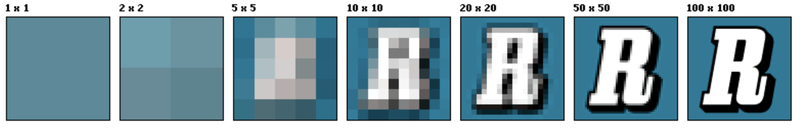

이미지와 픽셀의 관계에 관한 기본적인 사실만 나열하면 다음과 같습니다.

* 이미지는 수많은 점(픽셀)들로 구성되어 있습니다.
* 각각의 픽셀은 R, G, B 값 3개 요소의 튜플로 색상이 표시됩니다. (Red, Green, Blue의 값이에요)
   - 흰색(W) : (255,255,255)
   - 검정색(B) : (0, 0, 0)
   - 빨간색(R) : (255, 0, 0)
   - 파란색(B) : (0, 0, 255)
   - 녹색(G) : (0, 128, 0)
   - 노란색(Y) : (255, 255, 0)
   - 보라색(P) : (128, 0, 128)
   - 회색(Gray) : (128, 128, 128)  
   
   
* 흑백의 경우에는 Gray 스케일로 나타내는데, 0~255 범위의 숫자 1개의 튜플 값이에요.  


* Color는 투명도를 포함하는 A(alpha)를 포함해 RGBA 4개로 표시하기도 합니다.


* 아래 그림처럼 Image의 좌표는 보통 왼쪽 위를 (0, 0)으로 표시하고, 오른쪽과 아래로 내려갈수록 좌표가 증가합니다.

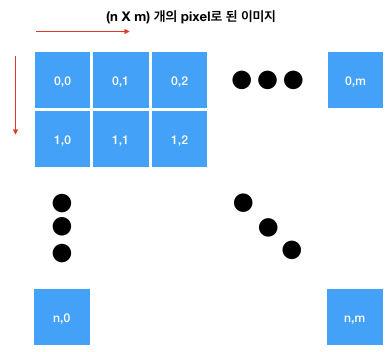

# 2) 이미지와 관련된 파이썬 라이브러리
***
* matplotlib
* PIL  

이미지 데이터를 처리하기 위해 추가로 matplotlib과 PIL 라이브러리를 이용할 거예요. 이 두 라이브러리는 이미지 파일을 열고, 자르고, 복사하고, rgb 색상 값을 가져오는 등 이미지 파일과 관련된 몇 가지 작업을 수행합니다. 이렇게 처리한 파일을 NumPy를 이용해 행렬로 빠르게 연산해서 이미지를 더 빠르게 작업하는 거예요.

In [44]:
import matplotlib as mpl
import PIL

print( f'# matplotlib : {mpl.__version__}')
print( f'# PIL: {PIL.__version__}')

# matplotlib : 3.4.3
# PIL: 8.3.2


# 3) 간단한 이미지 조작
***
몇 가지 예제를 하면서 연습해 볼게요.

**이미지 조작에 쓰이는 메서드**

* open : Image.open()
* size : Image.size
* filename : Image.filename
* crop : Image.crop((x0, y0, xt, yt))
* resize : Image.resize((w,h))
* save : Image.save()

1. open

`newyork.jpg` 자유의 여신상 파일을 예제로 연습해 봅시다.

클라우드에서는 위 사진을 다운로드할 필요 없습니다.   
Cloud Shell에서 다음과 같은 명령어를 입력하면 ~/aiffel/data_represent/image 디렉터리에 이미지가 준비됩니다.    


In [45]:
# $ mkdir -p ~/aiffel/data_represent/image    
# $ ln -s ~/data/newyork.jpg ~/aiffel/data_represent/image

/aiffel/aiffel/data_represent/image/newyork.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>


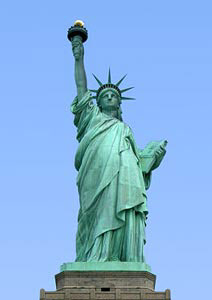

In [46]:
from PIL import Image, ImageColor
import os
img_path = os.getenv("HOME") + "/aiffel/data_represent/image/newyork.jpg"
img = Image.open(img_path)
print(img_path)
print(type(img))
img

Pillow의 Image.open()이라는 메서드를 통해 이미지 파일을 open 하였습니다. 이렇게 해서 얻어진 오브젝트 img는 PIL.JpegImagePlugin.JpegImageFile 라는 타입을 가지고 있습니다.

# 2.Size

In [47]:
img.size

(212, 300)

img.size를 입력하면 이미지 사이즈의 가로X세로가 각각 튜플 값으로 반환됩니다. 아래 코드처럼 많이 사용해요.

In [48]:
W, H =img.size
print(W,H)

212 300


In [49]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(212, 300)
RGB


# 3. 이미지 자르기
이미지를 자를 때에는 `.crop()` 메서드를 이용합니다. 인자로 튜플값을 받고, 가로 세로의 시작점과 가로, 세로의 종료점 총 4개를 입력해 줍니다.

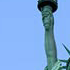

In [52]:
img.crop((30,30,100,100))

# 4. 저장
자른 이미지를 저장해 보도록 하겠습니다. 저장은 `.save()` 메서드를 사용하고, 매개변수로 파일 이름을 넣어 줍니다.

In [48]:
# 새로운 이미지 파일명
cropped_img_path = os. getenv("HOME") + "/aiffel/data_represent/image/cropped_img.jpg"
img.crop((30,30,100,100)).save(cropped_img_path)
print("저장 완료!")

저장 완료!


이미지가 잘 저장됐는지 확인해 봅시다! 아래 명령어를 실행했을 때 이미지의 경로가 나오면 성공입니다.

In [49]:
!ls ~/aiffel/data_represent/image/cropped_img.jpg

/aiffel/aiffel/data_represent/image/cropped_img.jpg


# 5.행렬로 변환
이미지 파일을 행렬로 변환해 보도록 하겠습니다.


In [50]:
import numpy as np
img_arr = np.array(img)
print(type(img))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.ndim)


<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(300, 212, 3)
3


💡 여기서 잠깐!

img_arr = np.array(img)가 정상동작했습니다. 의아합니다. img는 파이썬 리스트 타입이 아니라 PIL.JpegImagePlugin.JpegImageFile 라는 타입을 가지고 있습니다.
어떻게 np.array(img)가 정상동작한 걸까요?

`PIL.JpegImagePlugin.JpegImageFile`는 `PIL.Image.Image` 라는 클래스를 상속받은 타입입니다. 이 PIL.Image.Image 클래스는 리스트를 상속받지 않았지만 __array_interface__라는 속성이 정의되어 있습니다. 이 덕분에 Pillow 라이브러리는 손쉽게 이미지를 Numpy ndarray로 변환 가능합니다.

컬러(RGB) 이미지 파일이니, 변환된 행렬은 `Height X Width X RGB Channel`의 모양이고 차원 역시 3차원입니다.

In [51]:
img_arr

array([[[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       [[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       [[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       ...,

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]],

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]],

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]]

# 6. 흑백 모드
파일을 열 때 흑백 모드로 사진을 열 수도 있습니다. Image.open().convert('L')로 모드를 조정할 수 있습니다.

Pillow의 이미지 처리 옵션에 대한 더 상세한 정보는 아래 링크에서 Modes 항목을 참고해 주세요.

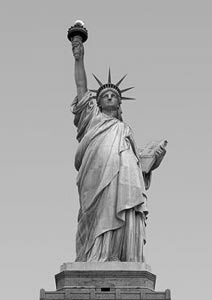

In [54]:
img_g = Image.open(img_path).convert('L')
img_g

In [55]:
img_g_arr = np.array(img_g)
print(type(img_g_arr))
print(img_g_arr.shape)
print(img_g_arr.ndim)

<class 'numpy.ndarray'>
(300, 212)
2


흑백이므로 반환된 행렬은 `Height X Width`, 차원은 2차원입니다.

In [54]:
img_g_arr

array([[174, 174, 174, ..., 174, 174, 174],
       [174, 174, 174, ..., 174, 174, 174],
       [174, 174, 174, ..., 174, 174, 174],
       ...,
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195]], dtype=uint8)

# 7. get color
색상 값은 3개 원소의 튜플로, 각각의 원소는 R, G, B 값을 의미한다고 그랬죠? `getcolor()`는 각 색상이 RGB 값으로 어떻게 표현되는지를 반환합니다.

In [56]:
red = ImageColor.getcolor('RED','RGB')
reda = ImageColor.getcolor('red','RGBA')
yellow = ImageColor.getcolor('yellow','RGB')
print(red)
print(reda)
print(yellow)

(255, 0, 0)
(255, 0, 0, 255)
(255, 255, 0)


딥러닝에서 위와 같은 이미지 조작은 Data augmentation를 할 때 많이 사용됩니다. Data augmentation은 말 그대로 데이터를 증강하는 것으로 딥러닝에서 데이터의 개수를 늘릴 때 사용되는 기법입니다. 추후 노드 상세 내용을 학습할 예정이오니 지금은 참고 링크만 방문해 보세요.

# 8-9. 구조화된 데이터란?
일반적으로 데이터를 변수에 저장해서 프로그래밍을 하는데요, 숫자나 텍스트 같은 데이터는 number나 string 형태로 데이터를 저장합니다. 한 번에 연속열(Sequence)을 저장할 때는 배열(array)이라는 자료 구조를 사용했습니다. 배열에는 대표적으로 리스트, 튜플이 있고, 좀 더 간편하게 선형대수를 표현하기 위한 배열로 NumPy의 ndarray를 사용했어요.

그럼 이런 형태의 데이터는 어떨까요? 국제전화 국가 번호 데이터를 저장한다고 해 볼게요.

Country_PhoneNumber
- Korea: 82
- America: 1
- Swiss: 41
- Italy: 39
- Japan: 81
- China: 86
- Rusia: 7

이런 형태의 데이터는 어떻게 저장하면 좋을까요? 위 데이터에서 한국 국가번호 값 82를 찾기 위해서 데이터에 번호를 매겨서 인덱스 형태로 찾는 게 좋을까요, 아니면 한국을 쳤을 때 나오는 게 좋을까요? 한국이란 단어로 찾는 게 좋겠죠? 이렇게 어떤 데이터의 값을 찾을 때 인덱스가 아닌 "한국", "미국" 등의 키(key)를 사용해 데이터에 접근하는 데이터 구조를 해시(hash)라고 합니다.

Hash란 Key와 Value로 구성되어 있는 자료 구조로 두 개의 열만 갖지만 수많은 행을 가지는 구조체입니다.

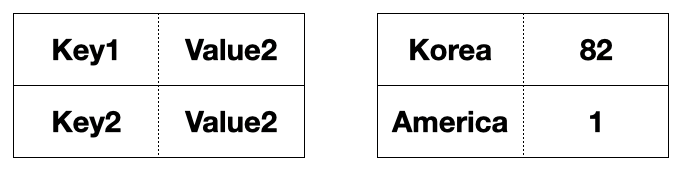

해시는 다른 프로그래밍 언어에서는 매핑(mapping), 연관배열(associative array) 등으로 불리고 파이썬에서는 "딕셔너리(dictionary)" 또는 dict로 알려져 있습니다. 파이썬 딕셔너리는 중괄호{}를 이용하고 키 : 값의 형태로 각각 나타냅니다.

In [58]:
# 파이썬 dict 로 표현한 전화번호부입니다. 
Country_PhoneNumber = {'Korea': 82, 'America': 1, 'Swiss': 41, 'Italy': 39, 'Japan': 81, 'China': 86, 'Rusia': 7}
Country_PhoneNumber['Korea']  # 키를 가지고 값을 조회할 수 있습니다.
# Country_PhoneNumber['Swiss']

82

# 8-10. 딕셔너리(dictionary)를 활용한 간단한 판타지 게임 logic 설계

딕셔너리를 이용해 몇 가지 예제를 풀어볼게요.

당신은 게임회사에 취직해 판타지 게임을 위한 로직을 만들고 있습니다.

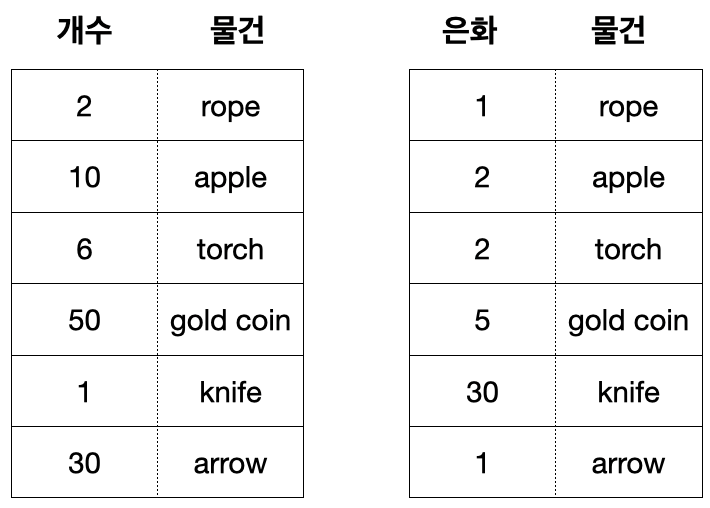

플레이어가 보물 상자를 얻었을 때, 보물 상자 안에 있는 물품과 각 물품을 통해 얻은 은화를 보여주는 프로그램을 만든다고 해 볼게요.

보물 상자에 다음과 같은 물건이 들어 있을 때, 각 물품은 게임 세계의 돈인 은화로 거래될 수 있습니다.  

* 물품을 보여주는 함수


In [73]:
treasure_box = {'rope':2, 
                'apple':10, 
                'torch': 6, 
                'gold coin': 50, 
                'knife': 1, 
                'arrow': 30}

def display_stuff(treasure_box):
    print("Congraturation!! you got a treasure box")
    for k, v in treasure_box.items():
        print("you have {} {}pcs".format(k, v))
display_stuff(treasure_box)

Congraturation!! you got a treasure box
you have rope 2pcs
you have apple 10pcs
you have torch 6pcs
you have gold coin 50pcs
you have knife 1pcs
you have arrow 30pcs


* 물품을 통해 얻을 은화를 보여주는 함수

In [74]:
coin_per_treasure = {'rope':1,
        'apple':2,
        'torch': 2,
        'gold coin': 5, 
        'knife': 30,
        'arrow': 1}

def total_silver(treasure_box, coin_per_treasure):
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]
        print("{} : {}coins/pcs * {}pcs = {} coins".format(
          treasure, coin_per_treasure[treasure], treasure_box[treasure], coin))
        total_coin += coin
    print('total_coin : ', total_coin)
total_silver(treasure_box, coin_per_treasure)

rope : 1coins/pcs * 2pcs = 2 coins
apple : 2coins/pcs * 10pcs = 20 coins
torch : 2coins/pcs * 6pcs = 12 coins
gold coin : 5coins/pcs * 50pcs = 250 coins
knife : 30coins/pcs * 1pcs = 30 coins
arrow : 1coins/pcs * 30pcs = 30 coins
total_coin :  344


보물 상자 안의 물품과 개수와 은화를 각각의 딕셔너리 형태로 저장하고, 동일한 단어를 키로 사용해서 각각의 데이터 값을 매칭했습니다.

데이터를 하나의 변수에 저장할 수도 있습니다. "딕셔너리의 딕셔너리" 형태에요.

In [75]:
treasure_box = {'rope': {'coin': 1, 'pcs': 2},
                'apple': {'coin': 2, 'pcs': 10},
                'torch': {'coin': 2, 'pcs': 6},
                'gold coin': {'coin': 5, 'pcs': 50},
                'knife': {'coin': 30, 'pcs': 1},
               	'arrow': {'coin': 1, 'pcs': 30}
               }
treasure_box['rope']

{'coin': 1, 'pcs': 2}

이전 스텝에서 구조화된 데이터란?하고 던진 질문에 대한 답변을 드릴 때가 된 것 같습니다.

위의 코드에서 treasure_box 에 포함된 5개의 데이터는 내부적으로 coin과 pcs라는 내부 구조를 가집니다. 이렇게 **데이터 내부에 자체적인 서브 구조를 가지는 데이터를 구조화된 데이터** 라고 하겠습니다.

이런 데이터는 나중에 살펴보겠지만, 테이블(table) 형태로 전개됩니다. 위의 treasure_box 데이터는 5개의 행(row), 2개의 열(column)을 가진 데이터가 될 것입니다.

이런 경우엔 위에 작성했던 display_stuff()와 total_silver() 함수를 어떻게 작성하면 될까요? 직접 코딩해보세요.

In [76]:
def display_stuff(treasure_box):
    ## type your code
    print("Congraturation!! you got a treasure box!!")
    for treasure in treasure_box:
        print('You have {} {} pcs'.format(treasure, treasure_box[treasure]['pcs']))
  

display_stuff(treasure_box)

Congraturation!! you got a treasure box!!
You have rope 2 pcs
You have apple 10 pcs
You have torch 6 pcs
You have gold coin 50 pcs
You have knife 1 pcs
You have arrow 30 pcs


In [77]:
def total_silver(treasure_box, coin_per_treasure):
    ## type your code
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]['pcs']
        print("{} : {}coins/pcs * {}pcs = {} coins".format(
          treasure, coin_per_treasure[treasure], treasure_box[treasure]['pcs'], coin))
        total_coin += coin
    print('total_coin : ', total_coin)
  
total_silver(treasure_box, coin_per_treasure)

rope : 1coins/pcs * 2pcs = 2 coins
apple : 2coins/pcs * 10pcs = 20 coins
torch : 2coins/pcs * 6pcs = 12 coins
gold coin : 5coins/pcs * 50pcs = 250 coins
knife : 30coins/pcs * 1pcs = 30 coins
arrow : 1coins/pcs * 30pcs = 30 coins
total_coin :  344


구조화된 데이터로 구성하니 함수가 훨씬 간단해지지 않았나요? 다음 노드에서는 pandas를 사용해 구조화된 데이터를 다뤄볼 예정입니다.

# 8-11. 구조화된 데이터와 pandas (1) Series

구조화된 데이터를 키(key)와 값(value)으로만 나타내기에는 너무 제한적이에요. 표 형태로 나타내는 것이 보기에도 편합니다. 구조화된 데이터를 효과적으로 표현하기 위해 pandas라는 파이썬 라이브러리는 __Series__와 __DataFrame__이라는 자료 구조를 제공해요. 이 데이터 타입을 활용하면 구조화된 데이터를 더 쉽게 다룰 수 있습니다.

pandas의 특징을 나열하면 다음과 같습니다.  

* NumPy기반에서 개발되어 NumPy를 사용하는 애플리케이션에서 쉽게 사용 가능
* 축의 이름에 따라 데이터를 정렬할 수 있는 자료 구조
* 다양한 방식으로 인덱싱(indexing)하여 데이터를 다룰 수 있는 기능
* 통합된 시계열 기능과 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
* 누락된 데이터 처리 기능
* 데이터베이스처럼 데이터를 합치고 관계 연산을 수행하는 기능  

pandas는 NumPy와 동일하게 pip을 이용해서 설치할 수 있어요.

물론 우리 LMS 클라우드에서는 이미 설치되어 있으니 아래 설치 명령어는 참고용으로만 봐주세요!

$ pip install pandas 

# (1) Series
***
구조화 데이터를 표현하는 데 중요한 개념인 Series의 인덱스(Index)와 Name에 대해 알아봅시다. pandas에는 다양한 기능이 있는데요, 다른 기능들도 pandas 공식 문서를 참고하며 연습해 보세요.

Series는 일련의 객체를 담을 수 있는, 1차원 배열과 비슷한 자료 구조입니다. 따라서 배열 형태인 리스트, 튜플, 딕셔너리를 통해서 만들거나 NumPy 자료형(정수형, 실수형 등)으로도 만들 수 있습니다.

In [78]:
import pandas as pd
ser = pd.Series(['a','b','c',3])

ser

0    a
1    b
2    c
3    3
dtype: object

**Series의 인덱스(Index)**  
ser라는 Series 객체를 만들었습니다. pandas의 Series에는 index와 value가 있습니다. 위에서 보면 index는 순서를 나타낸 숫자이고 value는 배열로 표현된 실제 데이터의 값입니다.

Series 객체의 values를 호출하면 array 형태로 반환됨을 확인할 수 있습니다.

In [79]:
ser.values

array(['a', 'b', 'c', 3], dtype=object)

인덱스는 `RangeIndex`가 반환됩니다. 정수형 인덱스라고 생각하면 돼요.

In [65]:
ser.index

RangeIndex(start=0, stop=4, step=1)

배열과 굉장히 유사하죠?

Series가 구조화된 데이터를 표현할 수 있는 이유는 인덱스에 다른 값을 넣을 수 있기 때문이에요. Series 객체를 만들 때 인자로 넣어주거나 '='와 같은 할당 연산자(Assignment Operators)를 이용해서 인덱스의 값을 지정할 수 있어요.

**인덱스 설정 : Series의 인자로 넣어주는 방법**

In [82]:
ser2 = pd.Series(['a','b','c',3], index=['i','j','k','h'])
ser2

i    a
j    b
k    c
h    3
dtype: object

**인덱스 설정: 할당 연산자**

In [84]:
ser2.index = ['Jhon','Steve','Jack','Bob']
ser2

Jhon     a
Steve    b
Jack     c
Bob      3
dtype: object

index를 조회하면 방금 전 `RangeIndex`가 아닌 `Index` 타입의 객체가 표시됩니다.


In [68]:
ser2.index

Index(['Jhon', 'Steve', 'Jack', 'Bob'], dtype='object')

Series에서 인덱스는 기본적으로 정수 형태로 설정되고, 사용자가 원하면 값을 할당할 수 있습니다. 따라서 파이썬 딕셔너리 타입의 데이터를 `Series` 객체로 손쉽게 나타낼 수 있어요.



In [69]:
Country_PhoneNumber = {'Korea':82, 'America':1,'Swiss':41,'Italy':39,'Japan':81,'China':86,'Rusia':7}
ser3 = pd.Series(Country_PhoneNumber)
ser3

Korea      82
America     1
Swiss      41
Italy      39
Japan      81
China      86
Rusia       7
dtype: int64

파이썬 딕셔너리를 사용해 초기화한 Series에서는 딕셔너리의 키가 인덱스로 설정됩니다.

Series의 인덱스를 다른 값으로 변경 가능하다는 것은 Series의 인덱스가 list의 인덱스이면서, 딕셔너리의 키와 같은 기능으로 작용할 수 있다는 것을 의미합니다. 기본 인덱스인 "0부터 시작하는 정수 형태"에서는 리스트와 유사하고, "값이 할당된" 인덱스에서는 딕셔너리와 유사합니다. 따라서 유연하게 데이터에 접근할 수 있어요.

비단 기본 인덱스뿐 아니라 값이 할당된 인덱스 형태에 대해서 슬라이싱(slicing) 기능을 지원하기도 하기도 하는 등의 특징이 있으니 연습해 두세요.

In [77]:
ser3['Korea']

82

In [80]:
ser3['Italy':]

Italy    39
Japan    81
China    86
Rusia     7
dtype: int64

**Series의 Name**  

Series 객체와 Series 인덱스는 모두 name 속성이 있습니다. 이 속성은 pandas의 DataFrame에서 매우 중요해요.

In [81]:
ser3.name = 'Country_PhoneNumber'
ser3.index.name = 'Country_Name'
ser3

Country_Name
Korea      82
America     1
Swiss      41
Italy      39
Japan      81
China      86
Rusia       7
Name: Country_PhoneNumber, dtype: int64

`Series` 객체의 `name` 속성을 이용해서 `Series` 객체의 이름을 설정하고,`Series` 인덱스의` name `속성을 이용해 인덱스 이름을 설정했습니다.

사실 pandas의 DataFrame은 Series의 연속입니다. 다음 스텝에서 자세히 설명할게요.

# 8-12. 구조화된 데이터와 pandas (2) DataFrame

**(2) DataFrame**
***
DataFrame은 표(table)와 같은 자료 구조입니다. Series는 한 개의 인덱스 컬럼과 값 컬럼, 딕셔너리는 키 컬럼과 값 컬럼과 같이 2개의 컬럼만 존재하는데 비해, DataFrame은 여러 개의 컬럼을 나타낼 수 있습니다. 그래서 csv 파일이나 excel 파일을 DataFrame으로 변환하는 경우가 많아요.

조금 헷갈릴 수 있으니 직접 Series와 DataFrame을 비교해 볼게요.

**Series로 변환**

In [85]:
data = {'Region' : ['Korea','America','Chaina','Canada','Italy'],
       'Sales': [300,200, 500, 150, 50],
       'Amount':[90, 80, 100, 30, 10],
       'Employee':[20, 10, 30, 5, 3]
       }

s = pd.Series(data)
s

Region      [Korea, America, Chaina, Canada, Italy]
Sales                      [300, 200, 500, 150, 50]
Amount                        [90, 80, 100, 30, 10]
Employee                         [20, 10, 30, 5, 3]
dtype: object

**DataFrame으로 변환**



In [83]:
d = pd.DataFrame(data)
d

,Region,Sales,Amount,Employee
0,Korea,300,90,20
1,America,200,80,10
2,Chaina,500,100,30
3,Canada,150,30,5
4,Italy,50,10,3


Series는 기본적으로 인덱스 외 한 개의 값 칼럼만을 가질 수 있고 그 칼럼의 데이터가 많더라도 배열 형태로 표현됩니다.

반면 DataFrame은 인덱스 칼럼 외에도 여러 개의 칼럼을 가질 수 있어요. 따라서 Index와 Column Index도 설정할 수 있습니다.

In [85]:
d.columns

Index(['Region', 'Sales', 'Amount', 'Employee'], dtype='object')

In [86]:
d.index

RangeIndex(start=0, stop=5, step=1)

In [89]:
d.index = ['one','two','three','four','five']
d.columns = ['a','b','c','d']
d

,a,b,c,d
one,Korea,300,90,20
two,America,200,80,10
three,Chaina,500,100,30
four,Canada,150,30,5
five,Italy,50,10,3


혹시 눈치채신 분이 있을 수 있는데요, Series의 name은 DataFrame의 Column 명입니다.  
  
  
**구조화된 데이터의 표현법**
***
구조화된 데이터를 파이썬의 자료형을 이용해서 여러 가지 방법으로 표현해 보았는데요, 정리하면 다음과 같습니다.

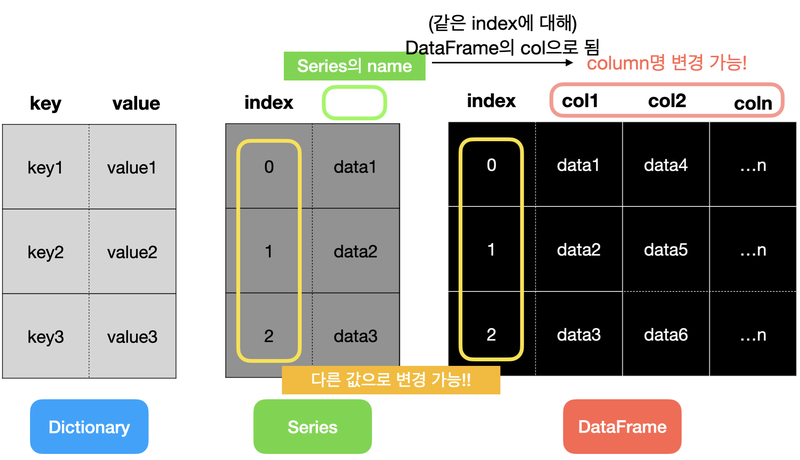